### Problem Statement

The problem statement is to explore customer segmentation through the interesting task of unsupervised learning method using online retail dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime , timedelta

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

In [44]:
df =pd.read_csv('Online Retail data.csv', encoding='Latin-1')

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01 December 2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01 December 2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01 December 2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01 December 2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01 December 2010,3.39,17850.0,United Kingdom


In [46]:
df.shape

(541909, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [48]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [49]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [50]:
df.loc[(df.Quantity<=0) & (df.UnitPrice<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,01 December 2010,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,02 December 2010,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,03 December 2010,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,03 December 2010,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,03 December 2010,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,07 December 2011,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,07 December 2011,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,07 December 2011,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,08 December 2011,0.0,NaN,United Kingdom


Removing rows where quantity<0 (return transaction) ,UnitPrice=0 and CustomerId is not present

In [51]:
df=df[~df.CustomerID.isnull()]
df = df[df.UnitPrice>0]
df = df[~(df.Quantity<0)]

In [52]:
df['amount'] =df['UnitPrice']*df['Quantity']

In [53]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

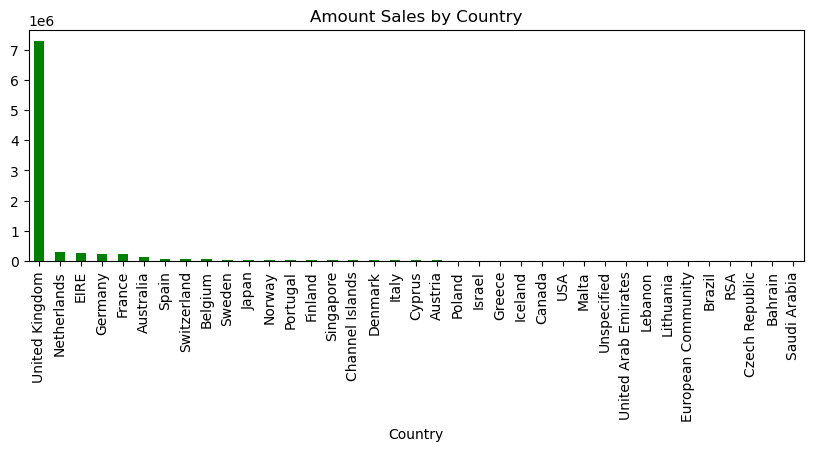

In [54]:
plt.figure(figsize=(10,3))
df.groupby(['Country']).amount.sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by Country',color = 'green')
plt.show()

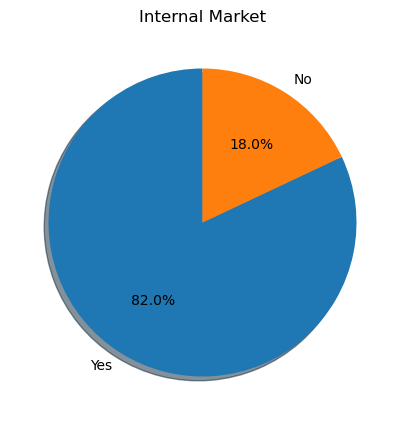

In [55]:
plt.figure(figsize=(8,5))
df['Internal'] = df.Country.apply(lambda x: "Yes" if x=='United Kingdom' else "No" )
market = df.groupby(['Internal']).amount.sum().sort_values(ascending =False)
plt.pie(market, labels = market.index,autopct='%1.1f%%',shadow =True,startangle =90)
plt.title('Internal Market')
plt.show()

In [56]:
g = df.groupby(['CustomerID']).amount.sum().sort_values(ascending = False).reset_index()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


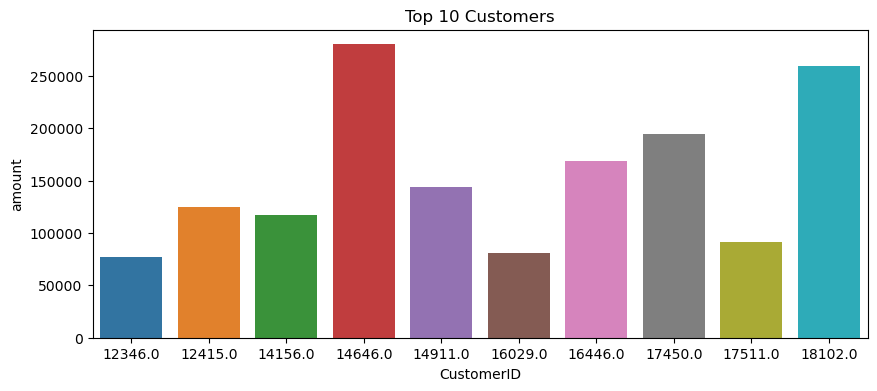

In [57]:
plt.figure(figsize=(10,4))
sns.barplot('CustomerID','amount',data=g[:10])
plt.title('Top 10 Customers')
plt.show()

In [58]:
k = df.groupby(['Description']).amount.sum().sort_values(ascending =False).reset_index()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


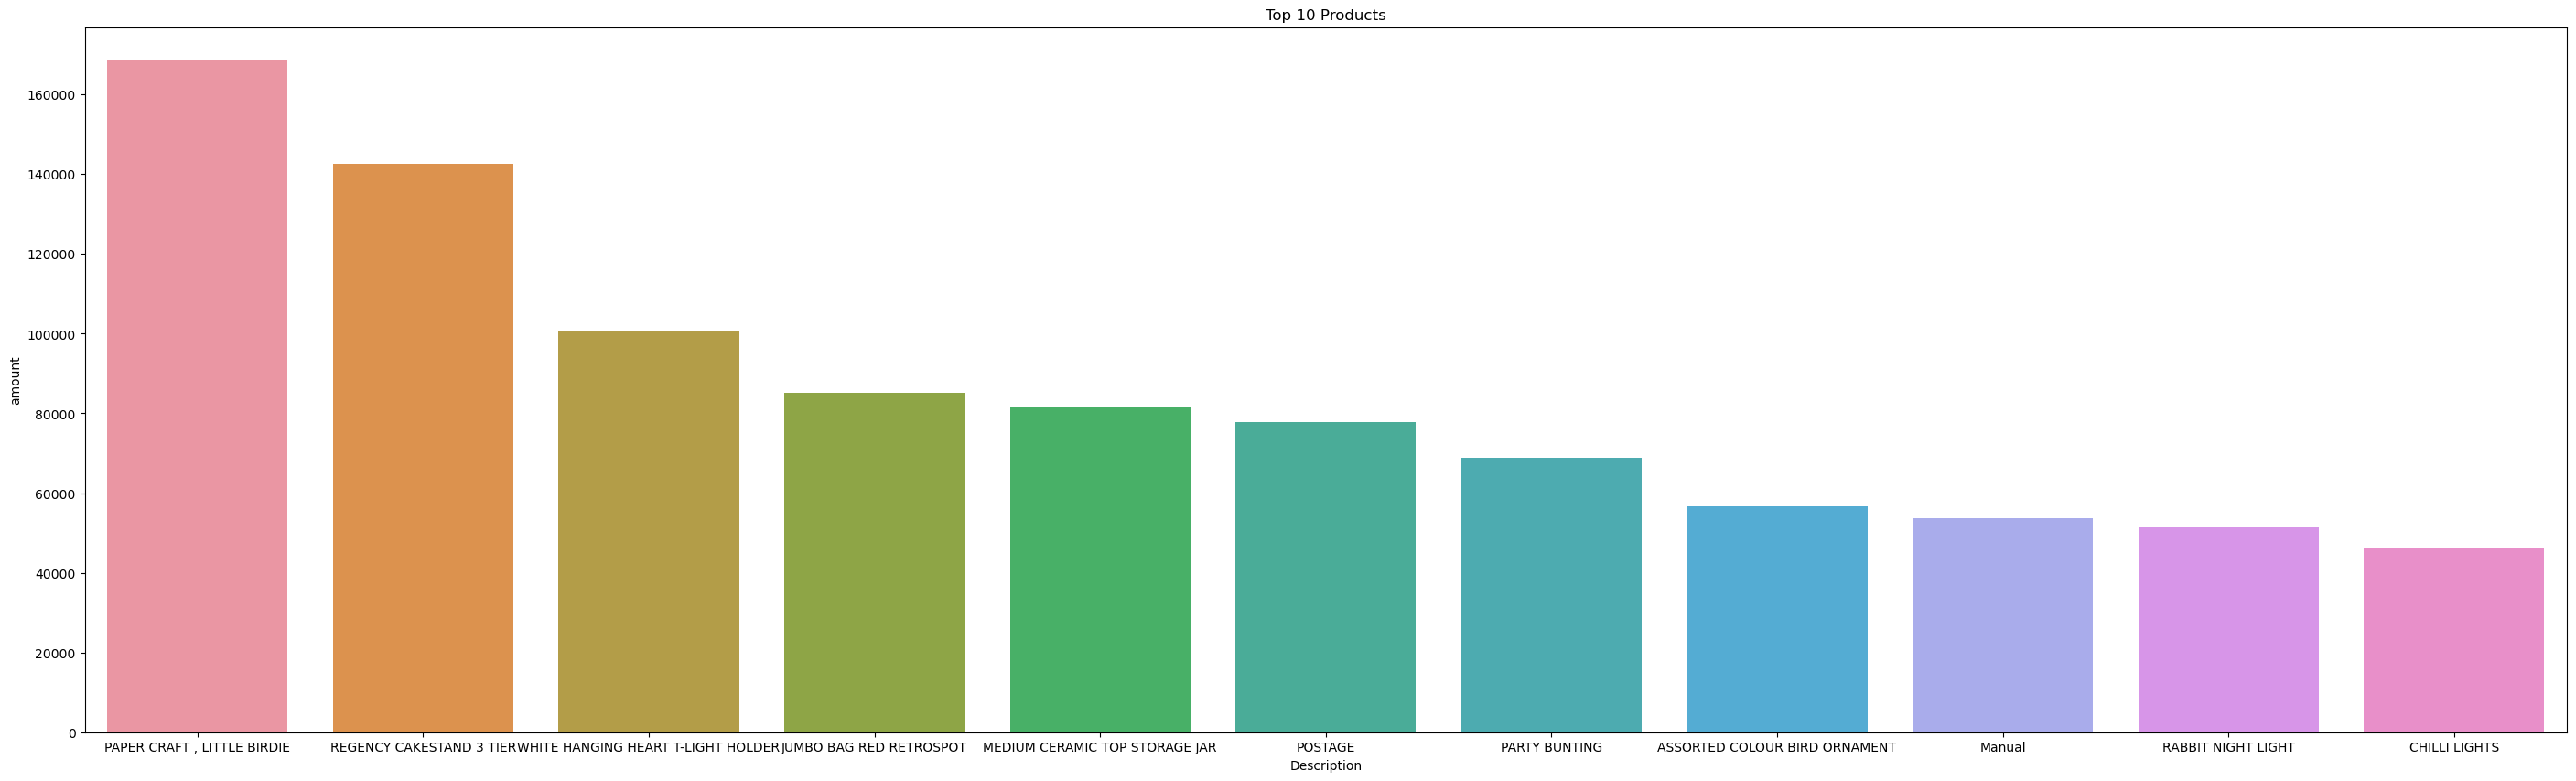

In [59]:
plt.figure(figsize=(35,10))
sns.barplot('Description','amount',data=k[:11])
plt.title('Top 10 Products')
plt.show()

### RFM Model for Customer value

In [60]:
reference_date = df['InvoiceDate'].max() +timedelta(days =1)
#Recency value
df['Recency'] = (reference_date-df['InvoiceDate']).astype('timedelta64[D]')
customer_df = df[['CustomerID','Recency']].groupby("CustomerID").min().reset_index()
#Monetary value
monetary = df[['CustomerID','amount']].groupby("CustomerID").sum().reset_index()
customer_df = monetary.merge(customer_df)
#Frequency value
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_df = customer_df.merge(customer_freq)

In [61]:
customer_df.describe()

,CustomerID,amount,Recency,frequency
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2054.266460,93.059474,4.272015
std,1721.808492,8989.230441,100.012264,7.697998
min,12346.000000,3.750000,1.000000,1.000000
25%,13813.250000,307.415000,18.000000,1.000000
50%,15299.500000,674.485000,51.000000,2.000000
75%,16778.750000,1661.740000,142.750000,5.000000
max,18287.000000,280206.020000,374.000000,209.000000


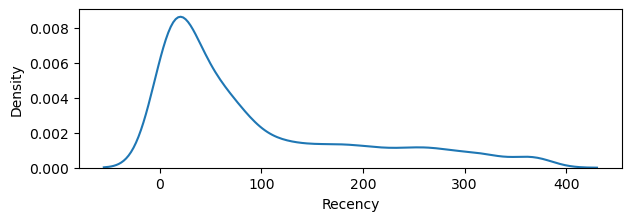

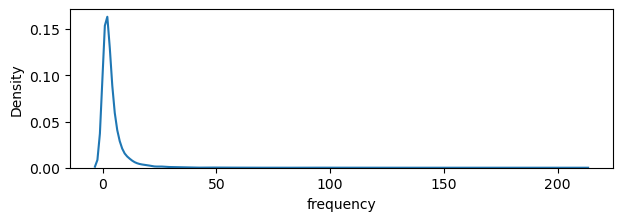

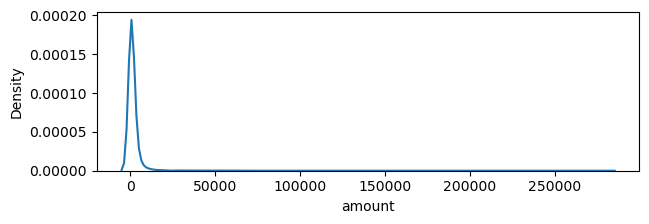

In [92]:
columns =['Recency','frequency','amount']
count =1
for col in columns:
    plt.figure(figsize=(7,7))
    plt.subplot(3,1,count)
    sns.kdeplot(x=customer_df[col])
    count +=1
plt.show()

#### Data preprocessing

Each variable can take huge range of values mainly monetary amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

In [88]:
import math

In [93]:
customer_df['recency_log'] = customer_df['Recency'].apply(math.log)
customer_df['frequency_log'] = customer_df['frequency'].apply(math.log)
customer_df['amount_log'] = customer_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_df[feature_vector] #.as_matrix()
scale = StandardScaler().fit(X_subset)
X_scaled = scale.transform(X_subset)

In [23]:
error =[]
for i in range(1,21):
    model =KMeans(n_clusters =i,init='k-means++',n_init=10,max_iter=300,tol=0.0001,verbose=0,random_state=42)
    model.fit(X_scaled)
    error.append(model.inertia_)

Text(0, 0.5, 'WCSS')

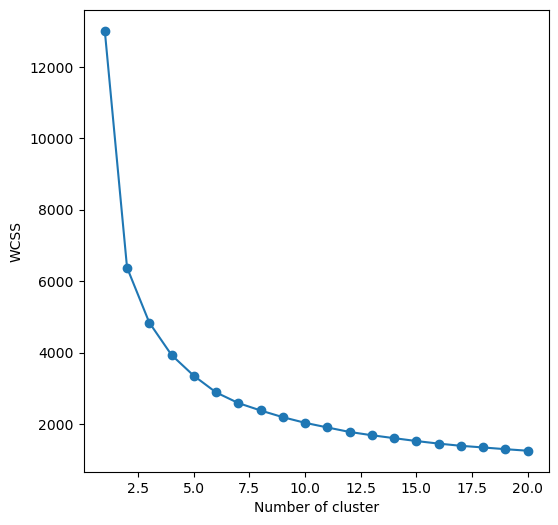

In [24]:
frame = pd.DataFrame({'Cluster':range(1,21),'SSE':error})
plt.figure(figsize=(6,6))
plt.plot(frame['Cluster'],frame['SSE'],marker ='o')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

In [25]:
features =['Amount','Recency','Frequency']
cluster_centers = dict()

n_clusters =7
clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
cluster_labels = clusterer.fit_predict(X_scaled)
cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                     'labels':cluster_labels}})
print("Centers of each cluster:")
cent_transformed = scale.inverse_transform(cluster_centers[n_clusters]['cluster_center'])
print(pd.DataFrame(np.exp(cent_transformed),columns=features))
print('-'*50)

Centers of each cluster:
         Amount     Recency  Frequency
0    815.752704  108.058661   2.280582
1  10108.112614    5.749382  20.512343
2    206.162632  226.453490   1.085443
3    659.921505   14.137641   2.637260
4    239.449467   37.577498   1.130847
5   2382.240053   38.874482   5.952321
6   2125.901008    5.248740   6.463536
--------------------------------------------------


In [26]:
score = silhouette_score(X_scaled,cluster_labels)
score

0.30954679253338563

C:\Users\hp\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


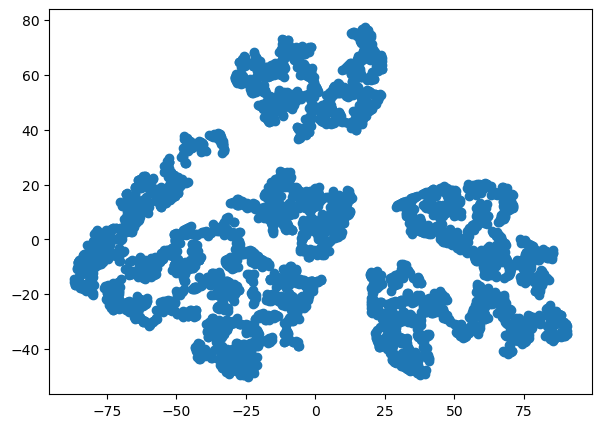

In [28]:
from sklearn.manifold import TSNE
model1 = TSNE(n_components=2, random_state=0)
tsne_data = model1.fit_transform(X_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


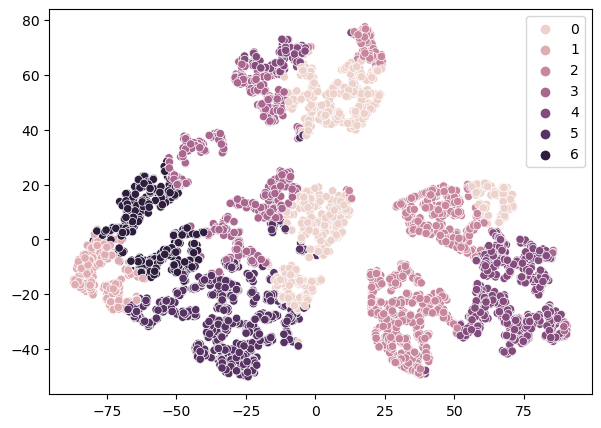

In [29]:
plt.figure(figsize=(7, 5))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=cluster_labels)
plt.show()

In [30]:
customer_df['clusters_7'] = cluster_centers[7]['labels']

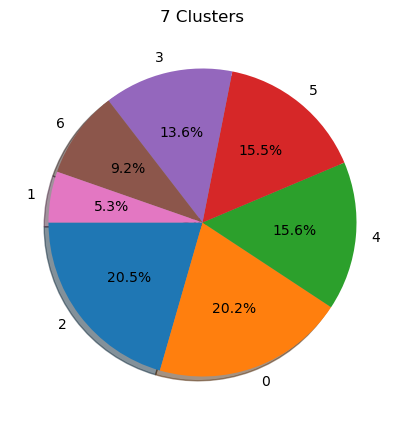

In [32]:
market = customer_df.clusters_7.value_counts()
plt.figure(figsize=(15,5))
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('7 Clusters')
plt.show()

### Conclusions

1. Cluster 1 defines those who shop often and with high amount.
2. Clusters 5 and 6 show good spending and good frequency, only deferring in how recent were their last purchases, where 5 is older, which suggests an active action to sell to group 5 as soon as possible and another to 6 seeking to raise its frequency.
3. Cluster 0 presents the fourth best purchase and a reasonable frequency, but this is a long time without buying. This group should be sensible to promotions and activations, so that they do not get lost and make their next purchase.
4. Cluster 3 is similar to 0, but has made its purchases more recently and has a slightly better periodicity. Then actions must be taken to raise their frequency and reduce the chances of them migrating to cluster 0 by staying longer without purchasing products.